In [20]:
import cv2

import numpy as np

from matplotlib import pyplot as plt

from skimage import exposure

from skimage.exposure import cumulative_distribution

from decimal import *

In [130]:
img_bgr = cv2.imread("Chamber.jpg")
img_rgb = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)

In [117]:
def weightGenerator(startpoint,endpoint,step):
    
    reverseList = False
    
    if (startpoint > endpoint) :
        startpoint,endpoint = endpoint,startpoint
        reverseList = True
    
    value = []
    newstep = (endpoint - startpoint) / (step + 1)
    for i in range (1,step+3,1):
        value.append(startpoint)
        startpoint = startpoint + newstep
    if reverseList:
        return value[::-1]
    return value
    
def gammacv(frame,weight):
    cframe = frame.copy()
    cframe[:,:,0] = ((cframe[:,:,0] / 255) ** weight) * 255
    cframe[:,:,1] = ((cframe[:,:,1] / 255) ** weight) * 255
    cframe[:,:,2] = ((cframe[:,:,2] / 255) ** weight) * 255

    return cframe
            
def write_video(file_path, frames , fps ,weight , time):
    """
    Writes frames to an mp4 video file
    :param file_path: Path to output video, must end with .mp4
    :param frames: List of PIL.Image objects
    :param fps: Desired frame rate
    """
    height, width, layers = frames.shape
    size = (width,height)
    time = fps * time
    writer = cv2.VideoWriter('project.avi',cv2.VideoWriter_fourcc(*'DIVX'), 60, size)
    for i in range(0,time,1):
        writer.write(gammacv(frames,weight[i]))
    writer.release()

In [121]:
weight = weightGenerator(0.1,3.0,300) + weightGenerator(3.0,0.1,300)
print(weight)

[0.1, 0.10963455149501662, 0.11926910299003324, 0.12890365448504984, 0.13853820598006644, 0.14817275747508304, 0.15780730897009965, 0.16744186046511625, 0.17707641196013285, 0.18671096345514945, 0.19634551495016606, 0.20598006644518266, 0.21561461794019926, 0.22524916943521586, 0.23488372093023246, 0.24451827242524907, 0.25415282392026567, 0.2637873754152823, 0.27342192691029893, 0.28305647840531556, 0.2926910299003322, 0.3023255813953488, 0.31196013289036545, 0.3215946843853821, 0.3312292358803987, 0.34086378737541534, 0.35049833887043197, 0.3601328903654486, 0.36976744186046523, 0.37940199335548186, 0.3890365448504985, 0.3986710963455151, 0.40830564784053175, 0.4179401993355484, 0.427574750830565, 0.43720930232558164, 0.44684385382059827, 0.4564784053156149, 0.46611295681063153, 0.47574750830564816, 0.4853820598006648, 0.4950166112956814, 0.504651162790698, 0.5142857142857146, 0.5239202657807311, 0.5335548172757477, 0.5431893687707643, 0.5528239202657809, 0.5624584717607974, 0.572093

In [157]:
#def write_video(file_path, frames , fps ,weight , time):
write_video("hi.avi", img_bgr , 60 ,weight , 10)

Text(0.5, 1.0, 'Hist Equalized Image')

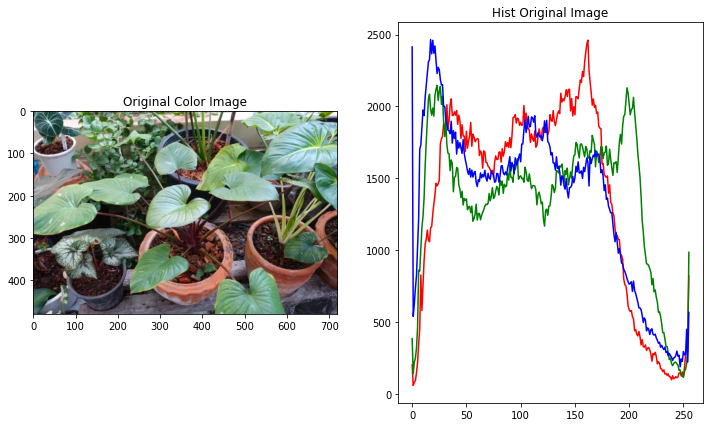

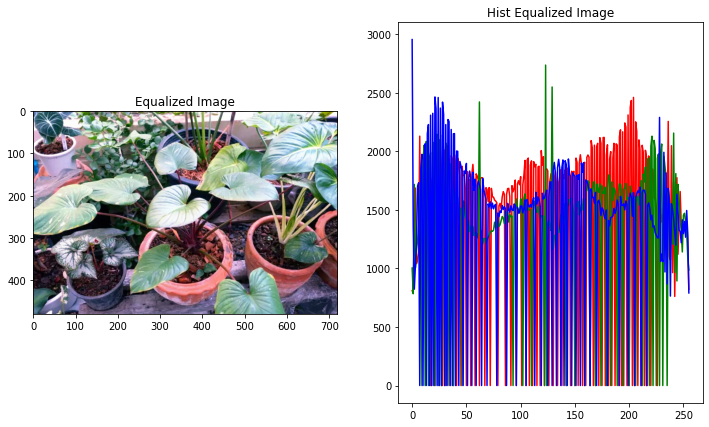

In [196]:
#cv2.calcHist(images, channels, mask, histSize, ranges)
img_bgr = cv2.imread("Image.jpg")
img_rgb = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)

histRed = cv2.calcHist([img_rgb],[0],None,[256],[0,256])
histGreen = cv2.calcHist([img_rgb],[1],None,[256],[0,256])
histBlue = cv2.calcHist([img_rgb],[2],None,[256],[0,256])


plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title('Original Color Image')
plt.subplot(1,2,2)
plt.plot(histRed,color = "red")
plt.plot(histGreen,color = "green")
plt.plot(histBlue,color = "blue")
plt.title('Hist Original Image')



img_rgb_eql = img_rgb.copy()
img_rgb_eql[:,:,0] = cv2.equalizeHist(img_rgb[:,:,0])
img_rgb_eql[:,:,1] = cv2.equalizeHist(img_rgb[:,:,1])
img_rgb_eql[:,:,2] = cv2.equalizeHist(img_rgb[:,:,2])

histRed = cv2.calcHist([img_rgb_eql],[0],None,[256],[0,256])
histGreen = cv2.calcHist([img_rgb_eql],[1],None,[256],[0,256])
histBlue = cv2.calcHist([img_rgb_eql],[2],None,[256],[0,256])

plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
plt.imshow(img_rgb_eql)
plt.title('Equalized Image')
plt.subplot(1,2,2)
plt.plot(histRed,color = "red")
plt.plot(histGreen,color = "green")
plt.plot(histBlue,color = "blue")
plt.title('Hist Equalized Image')



In [197]:
def cdf(im):
    c,b = cumulative_distribution(im)
    for i in range(b[0]):
        c = np.insert(c,0,0)
    for i in range(b[-1]+1,256):
        c= np.append(c,1)
    return c

def hist_matching (c,c_t,im):
    b = np.interp(c,c_t,np.arange(256))
    pix_repl = {i:b[i] for i in range(256)}
    mp = np.arange(0,256)
    for (k,v) in pix_repl.items():
        mp[k] = v
    s = im.shape
    im = np.reshape(mp[im.ravel()],im.shape)
    im = np.reshape(im,s)
    return im

In [198]:
img_mountain = cv2.imread("Mountain.jpg")
img_mountain = cv2.cvtColor(img_mountain,cv2.COLOR_BGR2RGB)
img_redmoon = cv2.imread("Redmoon.jpg")
img_redmoon = cv2.cvtColor(img_redmoon,cv2.COLOR_BGR2RGB)

Text(0.5, 1.0, 'Hist Color Image')

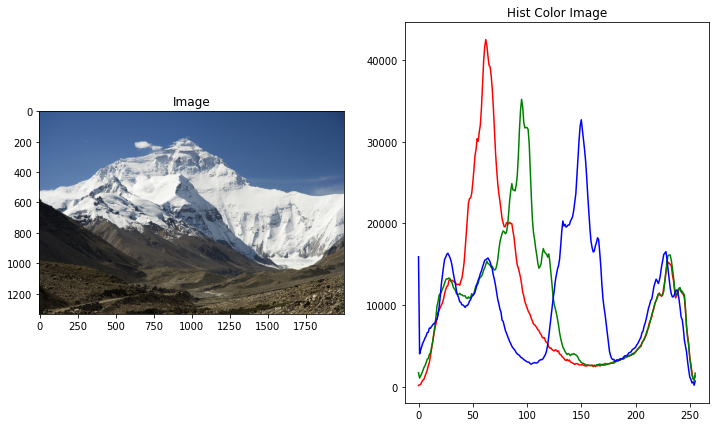

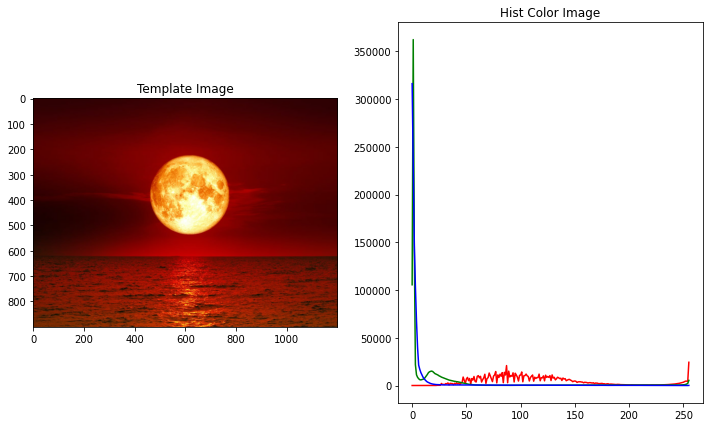

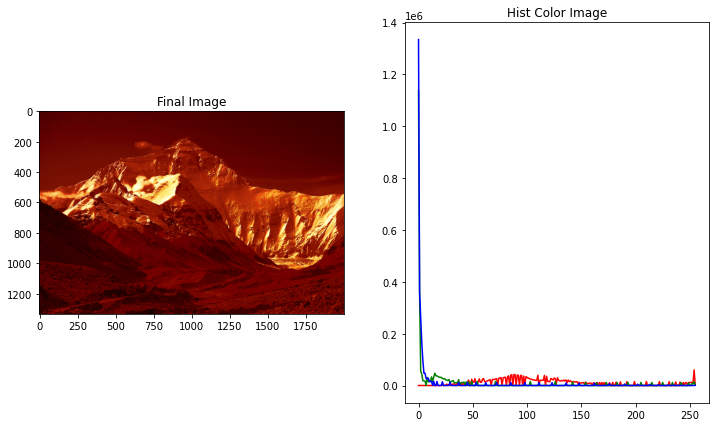

In [205]:
img_mountain_cdf_R = cdf(img_mountain[:,:,0])
img_redmoon_cdf_R= cdf(img_redmoon[:,:,0])
img_mountain_final_R = hist_matching(img_mountain_cdf_R,img_redmoon_cdf_R,img_mountain[:,:,0])

img_mountain_cdf_G = cdf(img_mountain[:,:,1])
img_redmoon_cdf_G= cdf(img_redmoon[:,:,1])
img_mountain_final_G = hist_matching(img_mountain_cdf_G,img_redmoon_cdf_G,img_mountain[:,:,1])

img_mountain_cdf_B = cdf(img_mountain[:,:,2])
img_redmoon_cdf_B= cdf(img_redmoon[:,:,2])
img_mountain_final_B = hist_matching(img_mountain_cdf_B,img_redmoon_cdf_B,img_mountain[:,:,2])

img_mountain_final = cv2.merge((img_mountain_final_R, img_mountain_final_G, img_mountain_final_B)).astype('uint8')


plt.figure(figsize=(12,7))
histRed = cv2.calcHist([img_mountain],[0],None,[256],[0,256])
histGreen = cv2.calcHist([img_mountain],[1],None,[256],[0,256])
histBlue = cv2.calcHist([img_mountain],[2],None,[256],[0,256])
plt.subplot(1,2,1)
plt.imshow(img_mountain)
plt.title('Image')
plt.subplot(1,2,2)
plt.plot(histRed,color = "red")
plt.plot(histGreen,color = "green")
plt.plot(histBlue,color = "blue")
plt.title('Hist Color Image')

plt.figure(figsize=(12,7))
histRed = cv2.calcHist([img_redmoon],[0],None,[256],[0,256])
histGreen = cv2.calcHist([img_redmoon],[1],None,[256],[0,256])
histBlue = cv2.calcHist([img_redmoon],[2],None,[256],[0,256])
plt.subplot(1,2,1)
plt.imshow(img_redmoon)
plt.title('Template Image')
plt.subplot(1,2,2)
plt.plot(histRed,color = "red")
plt.plot(histGreen,color = "green")
plt.plot(histBlue,color = "blue")
plt.title('Hist Color Image')


plt.figure(figsize=(12,7))
histRed = cv2.calcHist([img_mountain_final],[0],None,[256],[0,256])
histGreen = cv2.calcHist([img_mountain_final],[1],None,[256],[0,256])
histBlue = cv2.calcHist([img_mountain_final],[2],None,[256],[0,256])
plt.subplot(1,2,1)
plt.imshow(img_mountain_final)
plt.title('Final Image')
plt.subplot(1,2,2)
plt.plot(histRed,color = "red")
plt.plot(histGreen,color = "green")
plt.plot(histBlue,color = "blue")
plt.title('Hist Color Image')